<a href="https://colab.research.google.com/github/OviedoMarco/DataScience/blob/MENU/AvancePIA_II_Grupo002_Equipo09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

## Esquema:


**I. Introducción General.**

II. Descripción de los datos.

III. Justificación del uso de datos.

IV. Objetivo Final.

V. Preguntas de Interes

**B) Estructuración de los Datos.**

I. Carga del Dataset y Liberias.

II. Resumen

**C) Exploraty Data Analysis (EDA)**

I. Limpieza de Datos.

II. Estadisticas Basicas.

III. Graficas.

### I. Introducción General.

En resumidas cuentas, un fraude con tarjeta de crédito es un hecho mediante el cual unos delincuentes realizan operaciones como consumos en establecimientos físicos o virtuales, adelantos de efectivo, entre otras, para lo cual se aprovechan de la línea de crédito de los consumidores afectados. Un fraude con tarjeta de crédito puede ocurrir mediante el hurto o el robo de la tarjeta física y el PIN o clave secreta, o del único conocimiento de los datos confidenciales de esta, es decir su numeración completa, la fecha de vencimiento y el código CVV. En dicha medida, estos delincuentes pueden aprovechar y acumular diversos cargos con cargo a la línea de la tarjeta de crédito.

La predicción del fraude, y es que el comportamiento malicioso o fraude sigue patrones específicos y, por lo tanto, se puede predecir con base en ellos. A través del aprendizaje supervisado, se puede clasificar como fraudulenta o legítima a través de datos con una etiqueta clara sobre una pregunta base. Si la empresa financiera tiene acceso a todas las transacciones que se realizan con sus tarjetas, puede crear grandes conjuntos de datos y marcar los fraudes como tal. Así el machine learning, cuando vea algo similar lo detectará como fraude

### II. Descripción de los Datos.

**a) Que tipo de datos son.**

Es un DataSet en csv que contiene transacciones 284.807 transacciones y solo contiene variables numericas

**b) Descripcion de las columnas.**

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Importe' es el Importe de la transacción; esta función se puede utilizar para el aprendizaje dependiente de los costes por ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

### III. Justificación del Uso de Datos.

La base de datos viene ordenada de una manera practica y muy útil, lo que nos permitira realizar analisis con mayor facilidad y si se llega a requerrir el uso de modelos matematicos sera de una manera muy directa puesto que no contiene variables categoricas. Por otra parte la caracteristica que contendra la variable respuesta ya esta transformada en 1 en caso de fraude y 0 en caso contrario haciendonos ahorrar tiempo y esfuezo en el codigo

### IV. Objetivo Final.

**Objetivo Principal.**

Poder analizar el comportamiento de los fraudes de nuestro DataSet

**Objetivos Secundarios.**

*   Poder determinar con mayor exactitud las transacciones fraudulentas
*   Poder detectar los falsos positivos puesto que esto puede ocasionar una perdida de tiempo




### V. Preguntas de Interes.

*   ¿Existe algun patron a simple vista que nos ayuda a determinar las transacciones fraudulentas?
*   ¿Las transacciones fraudulentas tienen alguna correlación con alguna de nuestras variables?



## Estructuración de los Datos

### I. Carga del Dataset y Librerias

Importamos la libreria de **google.colab** para poder manipular nuestra base de datos que guardamos en nuestro drive

In [1]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


Leemos nuestra base de datos con la libreria pandas

In [2]:
import pandas as pd
pd.read_csv('/gdrive/MyDrive/creditcard.csv')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Es momento de cargar las librerias que se usaremos en este notebook para poder tratar los datos; de igual asiganeremos un nombre a nuestro dataframe.

In [4]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# Desactivar las advertencias para el cuaderno final
import warnings
warnings.filterwarnings('ignore')

# Carga de nuestro dataframe
df = pd.read_csv('/gdrive/MyDrive/creditcard.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos que nuestra base de datos cuenta con 284806 filas y 31 variables de las cuales:


*   **30 variables son flotantes**
*   **1 variable es entero**



### II. Resumen

Nuestra base de datos representa los datos de los clientes que han entrado a la financiera y han realizado transacciones, dandonos el dato importante de "Amount" (Monto) y "Class" (Si hubo fraude):
Contamos con 284806 transacciones y 31 columnas de las cuales tenemos una variables entera y 30 variables flotantes; viendolo de esta manera tenemos puras variables numericas por la razón de que la financiera proporciono una base de datos sin información personal del cliente por confidencialidad .
Esto sera un reto para nosotros pues teniendo en cuenta el punto anterior tenemos que determinar los factores y caracteristicas de la insidencia de fraude sin variables categoricas.


## Analisis Exploratorio Detallado de los Datos (EDA)

### I. Limpieza de Datos.

Para empezar con la limpieza de datos, veamos los primeros datos de nuestro dataframe para darnos una idea de como vamos a manipular nuestros datos.

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vemos que por el momento no es conveniente eliminar ninguna columna pues aun no sabemos que información sera relevante para nuestro analisis

Veamos si estamos tratando con datos nulos y si es asi veamos en donde se encuentran y cuantas son para poder tratarlas

In [7]:
plt.style.use('bmh')
# valores nulos
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

vemos que no contamos con valore nulos, esto nos ahorrara mucho trabajo 

Para poder dar una vista previa de los datos que nos ayudara en un futuro veamos si contamos con outliers en nuestras variables

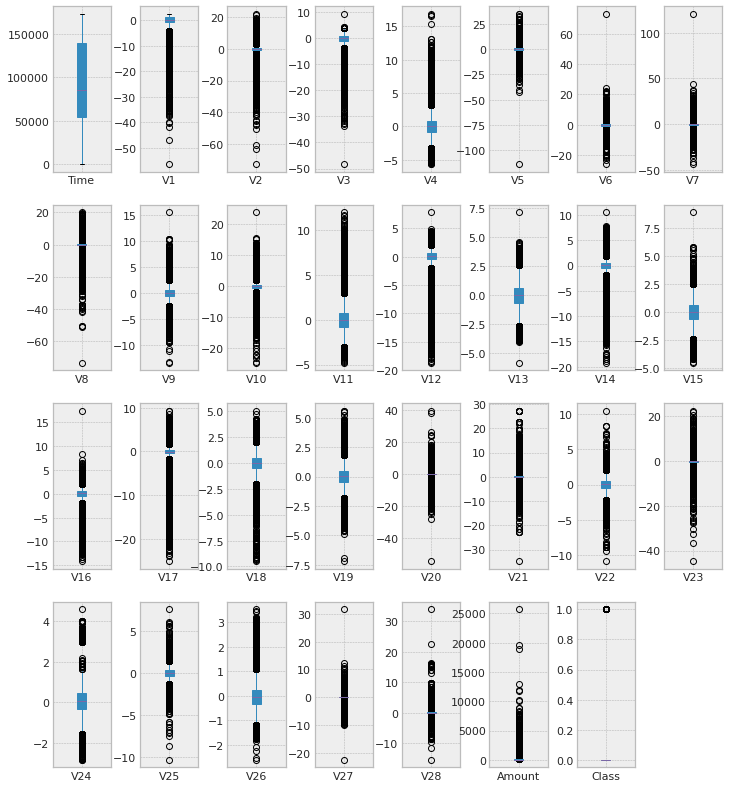

In [10]:
df_to_plot = df.drop(columns=[]).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,8), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Vemos que tenemos muchas variables que cuentan con outliers, entonces ya tenemos que contar con la idea que utilizaremos tecnicas para manipular estas variables

**Resumen:**

Vimos que tenemos un dataframe muy limpio y no tuvimos que manipularlo por el momento.

A como avanzando con la manipulación de los datos veremos que variables son las mas importantes y de ahi podremos seleccionar solo ciertas columnas por el momento solo hemos conseguido información de la data

### II. Estadisticas Basicas.

Analizemos el comportamiento de nuestras variables obteniendo:



*   Total de datos
*   Promedio
*   Desviación Estandar
*   Minimos, Maximos y Cuartiles



In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Un dato curioso es cuando vemos que el promdio del monto de las transacciones es de tan solo $88

Demos un vistazo a la simetria y curtosis de nuestra  variable "Amount"

Skewness: 16.977724
Kurtosis: 845.092646


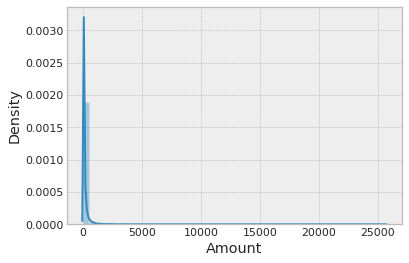

In [13]:
sns.distplot(df['Amount']);
print("Skewness: %f" % df['Amount'].skew())
print("Kurtosis: %f" % df['Amount'].kurt())

*   Asimetria Postiva
*   Altamente leptocurtica



Obtenemos la asimetria y curtosis de las variables faltantes

In [20]:
variables_numericas = df.dtypes[df.dtypes != "object"].index

In [21]:
for col in variables_numericas:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

Time            Skewness: -0.04     Kurtosis: -01.29
V1              Skewness: -3.28     Kurtosis: 032.49
V2              Skewness: -4.62     Kurtosis: 095.77
V3              Skewness: -2.24     Kurtosis: 026.62
V4              Skewness: 00.68     Kurtosis: 002.64
V5              Skewness: -2.43     Kurtosis: 206.90
V6              Skewness: 01.83     Kurtosis: 042.64
V7              Skewness: 02.55     Kurtosis: 405.61
V8              Skewness: -8.52     Kurtosis: 220.59
V9              Skewness: 00.55     Kurtosis: 003.73
V10             Skewness: 01.19     Kurtosis: 031.99
V11             Skewness: 00.36     Kurtosis: 001.63
V12             Skewness: -2.28     Kurtosis: 020.24
V13             Skewness: 00.07     Kurtosis: 000.20
V14             Skewness: -2.00     Kurtosis: 023.88
V15             Skewness: -0.31     Kurtosis: 000.28
V16             Skewness: -1.10     Kurtosis: 010.42
V17             Skewness: -3.84     Kurtosis: 094.80
V18             Skewness: -0.26     Kurtosis: 

*   Tiempo es platicurtica



### II. Graficas.

Tomando en cuenta la parte de Estaditicas Basicas, no interesa ver el comportomaiento del tiempo de nuestros datos pues es la unica variable platicurtica

Skewness: -0.035568
Kurtosis: -1.293530


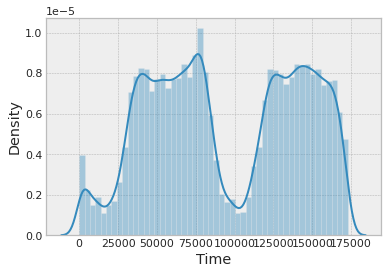

In [24]:
sns.distplot(df['Time']);
print("Skewness: %f" % df['Time'].skew())
print("Kurtosis: %f" % df['Time'].kurt())

Observamos algo interesante en el comportamineto del tiempo pues simplente se comporta muy desordenadamente

Como anteriormente obtuvimos las correlaciones de nuestras variables, veamos una matriz de correlacion de todas nuestras variables; esto nos ayudara a escoger las variables más determinantes

In [ ]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(variables_numericas)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

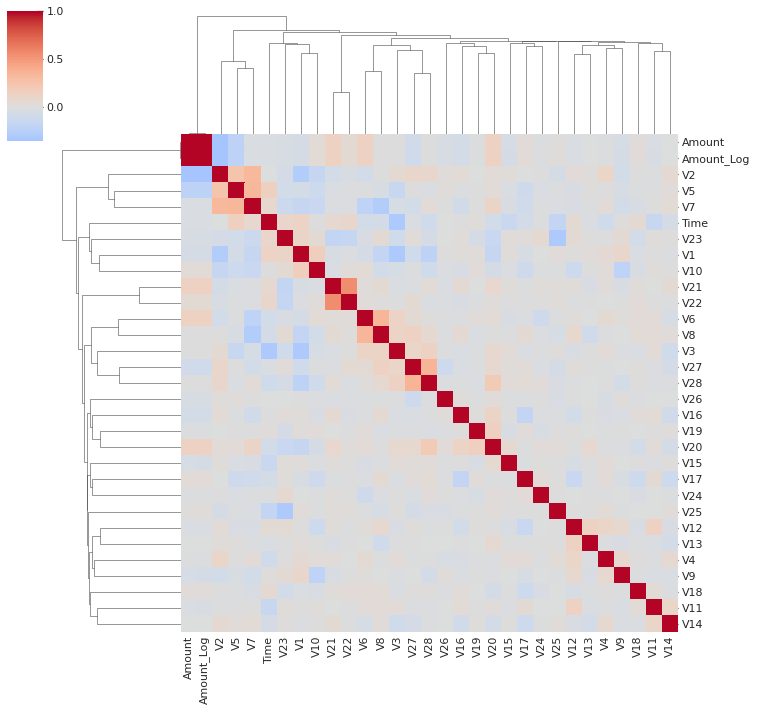

In [25]:
corrs = df.drop(columns='Class').select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

ValueError: ignored

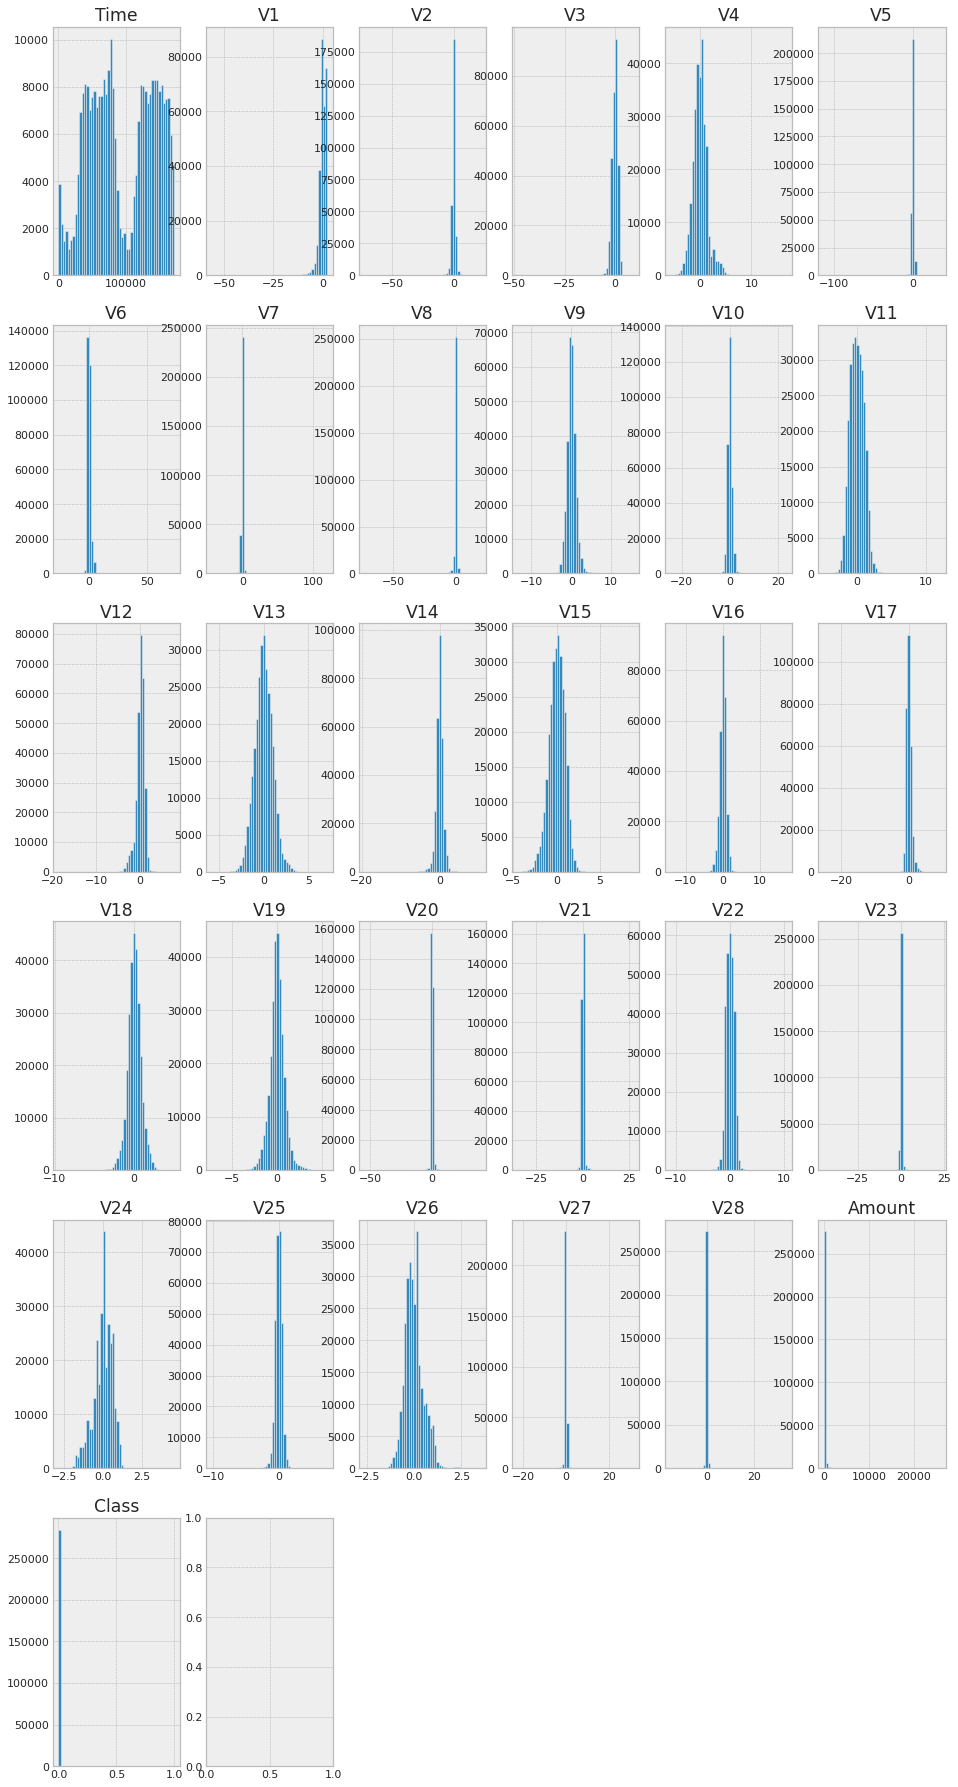

In [30]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 